In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [2]:
import pandas as pd
store_data = pd.read_csv(r"C:\Users\Computer\Downloads\database1.csv", header=None)
display(store_data.head())
print(store_data.shape)

,0,1,2,3
0,I1,I2,I5,NaN
1,I2,I4,NaN,NaN
2,I2,I3,NaN,NaN
3,I1,I2,I4,NaN
4,I1,I3,NaN,NaN


(9, 4)


In [3]:
records = []
for i in range(1, 9):
    records.append([str(store_data.values[i, j]) for j in range(0, 4)])

In [4]:
print(type(records))

<class 'list'>


In [5]:
association_rules = apriori(records, min_support=0.02, min_confidence=0.07, min_lift=3, min_length=2)
association_results = list(association_rules)

In [6]:
print(association_results)

[RelationRecord(items=frozenset({'I1', 'I3', 'I2', 'I5'}), support=0.125, ordered_statistics=[OrderedStatistic(items_base=frozenset({'I5'}), items_add=frozenset({'I1', 'I2', 'I3'}), confidence=1.0, lift=4.0), OrderedStatistic(items_base=frozenset({'I1', 'I3', 'I2'}), items_add=frozenset({'I5'}), confidence=0.5, lift=4.0)])]


In [7]:
print("There are {} Relation derived.".format(len(association_results)))

There are 1 Relation derived.


In [8]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'I1', 'I3', 'I2', 'I5'})


In [9]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: I1 -> I3
Support: 0.125
Confidence: 1.0
Lift: 4.0


In [ ]:
------------------------------------------------Lab7----------------------------------------------------------------------------

In [4]:
import pandas as pd
df = pd.read_csv('foods.csv')
df.head()

,First Name,Gender,City,Frequency,Item,Spend
0,Wanda,Female,Stamford,Weekly,Burger,15.66
1,Eric,Male,Stamford,Daily,Chalupa,10.56
2,Charles,Male,New York,Never,Sushi,42.14
3,Anna,Female,Philadelphia,Once,Ice Cream,11.01
4,Deborah,Female,Philadelphia,Daily,Chalupa,23.49


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['First Name'] = le.fit_transform(df['First Name'])
df['Gender'] = le.fit_transform(df['Gender'])
df['City'] = le.fit_transform(df['City'])
df['Frequency'] = le.fit_transform(df['Frequency'])
df['Item'] = le.fit_transform(df['Item'])
df['Spend'] = le.fit_transform(df['Spend'])
df

,First Name,Gender,City,Frequency,Item,Spend
0,194,0,2,6,0,129
1,59,1,2,0,2,80
2,33,1,0,2,5,395
3,11,0,1,4,4,83
4,44,0,1,0,2,210
...,...,...,...,...,...,...
995,51,0,0,1,5,811
996,3,1,1,0,5,711
997,85,0,2,6,3,36
998,91,0,0,0,2,406


In [11]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:-1], df.iloc[:, -1], test_size=0.2, random_state=5)

model = RandomForestClassifier()  # Define the model
model.fit(X_train, y_train)  # Fit the model to the training data

print(len(X_train))
print(len(X_test))

y_pred = model.predict(X_test)  # Make predictions


800
200


In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
model.score(X_test, y_test)

0.0

In [14]:
from sklearn.metrics import f1_score

In [15]:
f1_score(y_test, y_pred, average='micro')

0.0

In [16]:
f1_score(y_test, y_pred, average='macro')

0.0

In [17]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='micro')

0.0

In [19]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='macro', zero_division=0)  # Returns 0 for undefined precision
print("Precision Score:", precision)

Precision Score: 0.0


In [20]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro')

0.0

In [22]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='macro', zero_division=0)  # Returns 0 for undefined recall
print("Recall Score:", recall)

Recall Score: 0.0


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.svm import SVC
confusion_matrix(y_test, model.predict(X_test))
#True positive:predicted positive and it’s true.
#False positive: predicted positive and it’s false
#False negative: predicted negative and it’s false
#True negative: predicted negative and it’s true

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
X, y = make_classification(random_state=5)
clf = SVC(random_state=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
-----------------------------------------------Lab8-----------------------------------------------------------------------------
#clustering

In [1]:
import pandas as pd
import numpy as np
housing = pd.read_csv("HousingData.csv")
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [2]:
housing.dropna(inplace=True)
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

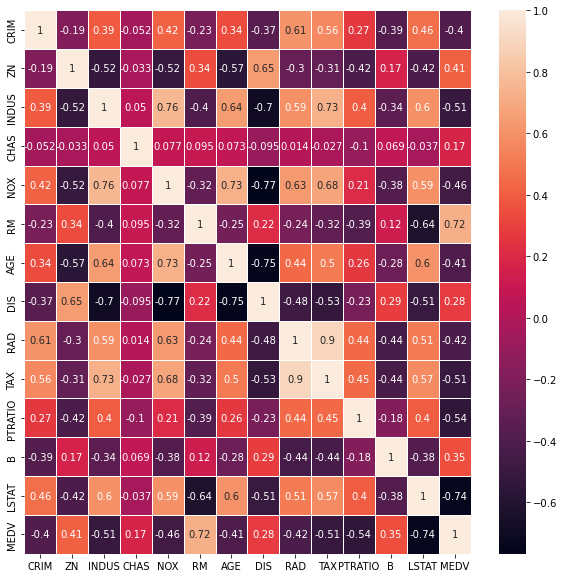

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(housing.corr(), annot=True, linewidths=1);

In [4]:
from sklearn.cluster import KMeans
k = 3
data_sample= housing.loc[:, ['CRIM','MEDV']]
model = KMeans(n_clusters=3)
model.fit(data_sample)
labels = model.predict(data_sample)

C:\Users\Shravani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [5]:
data_sample['Label_data']=labels
data_sample

,CRIM,MEDV,Label_data
0,0.00632,24.0,1
1,0.02731,21.6,1
2,0.02729,34.7,0
3,0.03237,33.4,0
5,0.02985,28.7,0
...,...,...,...
499,0.17783,17.5,1
500,0.22438,16.8,1
502,0.04527,20.6,1
503,0.06076,23.9,1


In [6]:
clusters= {}
for i in range(k):
    clusters[i] = []
for i in range(k):
    clusters[i].append(data_sample[data_sample['Label_data'] == i])
print(clusters[1][0]['MEDV'])

0      24.0
1      21.6
7      27.1
8      16.5
10     15.0
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 304, dtype: float64


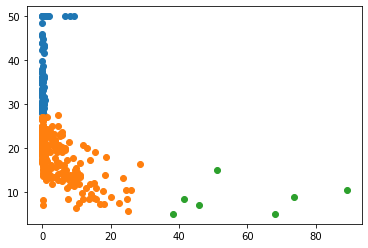

In [7]:
for i in range(k):
    plt.scatter(clusters[i][0]['CRIM'],clusters[i][0]['MEDV'])
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering
data_sample2 = data_sample
# Create Hierarchical clustering object
hierarchical = AgglomerativeClustering(n_clusters=3)
# Fit the model

hierarchical.fit(data_sample2)
# Get cluster Labels
labels = hierarchical.labels_
data_sample2['Label_data']=labels
clusters= {}
for i in range(k):
    clusters[i] = []